<a href="https://colab.research.google.com/github/viett887g/huanluyenmohinhbaloi/blob/main/huanluyenmohinhvaloi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
import numpy as  np
import os

In [ ]:
def readData(filePath: str, filename: str):
    data = np.loadtxt(os.path.join(filePath, filename), delimiter = ',')
    X = data[:,:-1]
    y = data[:, -1]
    m = X.shape[0]
    n = X.shape[1]
    X = np.reshape(X, (m,n))
    y = np.reshape(y, (m,1))
    #Them cot x0 = 1 vao X
    x0 = np.ones((m,1))
    X = np.column_stack([x0, X])
    return X, y

In [ ]:
def featureVectorScaling(data):
    avg = np.mean(data)
    sln = data.max()
    snn = data.min()
    data_scl = (data - avg)/(sln - snn)
    print(data_scl[1])
    return data_scl

def normalizeData(X):
    X_scl = X[:, 0]
    for i in range(1, X.shape[1]):
        scl = featureVectorScaling(X[:, i])
        X_scl = np.column_stack([X_scl, scl])
    return X_scl

In [ ]:
def sigmoid(X, w):
    result = 1/(1 + np.exp(-np.dot(X, w)))
    return result

In [ ]:
def loss(X, y, w):
    m = y.shape[0]
    result = (-1/m)*np.sum(np.dot(y.T, np.log(sigmoid(X, w))) + np.dot((1 - y).T, np.log(1 - sigmoid(X, w))))
    return result

In [ ]:
def gradient(X, y, w):
    m = X.shape[0]
    result = (1/m)*np.dot(X.T, sigmoid(X, w) - y)
    return result

In [ ]:
def gradientDescent(X, y, w, alpha, n_iters):
    w_optimal = w.copy()
    J_history = []
    for i in range(n_iters):
        w_optimal = w_optimal - alpha*gradient(X, y, w_optimal)
        J_history.append(loss(X, y, w_optimal))
    return w_optimal, J_history

In [ ]:
def predict(y_pred):
    return np.rint(y_pred) #lam tron neu lon hon 0.5 thanh 1 

Hàm precision_score tính toán độ chính xác, phân số (mặc định) hoặc số lượng (chuẩn hóa = Sai) của các dự đoán đúng.

Trong phân loại đa nhãn, hàm trả về độ chính xác của tập hợp con. Nếu toàn bộ tập hợp các nhãn được dự đoán cho một mẫu khớp hoàn toàn với tập hợp các nhãn thực, thì độ chính xác của tập hợp con là 1,0; nếu không thì nó là 0,0.

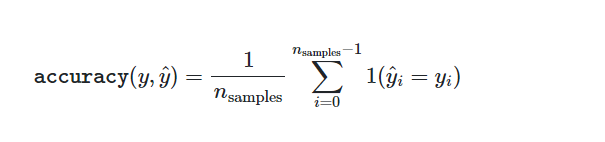

In [ ]:
def acc_score(y, y_hat):
    m = y.shape[0]
    result = (1/m)*np.sum(y == y_hat)
    return  result

Top-k accuracy score

Hàm top_k_accuracy_score là một tổng quát của độ chính xác. Sự khác biệt là một dự đoán được coi là đúng miễn là nhãn đúng được kết hợp với một trong k điểm dự đoán cao nhất. độ chính xác là trường hợp đặc biệt của k = 1.

Hàm bao gồm các trường hợp phân loại nhị phân và đa thủy tinh nhưng không bao gồm trường hợp đa nhãn

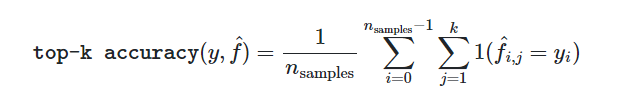

In [ ]:
def top_k_acc(y,y_hat):
  #m=y.shape[0]
  #dit=(1/m)*np.sum(np.sum(y==y_hat))
  dit=top_k_accuracy_score(y, y_hat, k=3)
  return dit

Hàm balance_accuracy_score tính toán độ chính xác cân bằng, giúp tránh các ước tính hiệu suất tăng cao trên các tập dữ liệu không cân bằng. Nó là trung bình vĩ mô của điểm thu hồi trên mỗi lớp hoặc tương đương, độ chính xác thô trong đó mỗi mẫu được tính theo tỷ lệ nghịch đảo của lớp thực của nó. Vì vậy, đối với các tập dữ liệu cân bằng, điểm số bằng với độ chính xác.

Trong trường hợp nhị phân, độ chính xác cân bằng bằng giá trị trung bình cộng của độ nhạy (tỷ lệ dương tính thực) và độ đặc hiệu (tỷ lệ âm tính thực), hoặc diện tích dưới đường cong ROC với các dự đoán nhị phân thay vì điểm số:

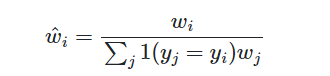

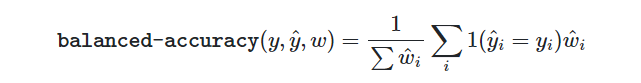

In [ ]:
def balanced_acc(y,y_hat):
  me=balanced_accuracy_score(y, y_hat)
  return me

Nói một cách trực quan, độ chính xác là khả năng của bộ phân loại không gắn nhãn là dương tính đối với mẫu âm và khả năng thu hồi là khả năng của bộ phân loại để tìm tất cả các mẫu dương tính.

In [ ]:
def precision(y,y_hat,average): 
  return precision_score(y, y_hat,average='macro')

Độ thu hồi là tỷ số tp / (tp + fn) trong đó tp là số lần dương tính đúng và fn là số lần âm tính giả. Việc thu hồi là khả năng trực quan của bộ phân loại để tìm tất cả các mẫu dương tính.

Giá trị tốt nhất là 1 và giá trị kém nhất là 0

In [ ]:
def recallscore(y,y_hat,average):
  return recall_score(y, y_hat, average='macro')

Điểm F1 có thể được hiểu là giá trị trung bình hài hòa của độ chính xác và độ thu hồi, trong đó điểm F1 đạt giá trị tốt nhất là 1 và điểm kém nhất là 0. Đóng góp tương đối của độ chính xác và thu hồi vào điểm F1 là bằng nhau. Công thức cho điểm F1 là:

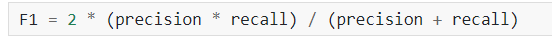

In [ ]:
def hamF1(y,y_hat,average):
  return 2*(np.dot(precision(y,y_hat,average),recallscore(y,y_hat,average)))/(precision(y,y_hat,average)+recallscore(y,y_hat,average))

In [ ]:
def main():
    X, y = readData('/content','ex2data1.txt')
    X_scl = normalizeData(X)
    n = X_scl.shape[1]
    w = np.zeros((n, 1))
    alpha = 0.01
    n_iters = 2000
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=15)
    w_opt, J_hist = gradientDescent(X_train, y_train, w, alpha, n_iters)
    y_hat = predict(sigmoid(X_test, w_opt))
    print('Chỉ số Accuracy: ', acc_score(y_test, y_hat))
    print('Sử dụng sklearn, Acc: ', accuracy_score(y_test.flatten(), y_hat.flatten()))
    print(". . . . . . . ..  .\n")
    print("Chỉ số top_k_accuracy_score",top_k_accuracy_score(y_test, y_hat, k=2))
    print("Sử dụng sklearn top K",top_k_acc(y_test,y_hat))
    print(". . . . . . . ..  .\n")
    print("Chỉ số balance_accuracy_score", balanced_acc(y_test,y_hat))
    print("Sử dụng sklearn balance_accuracy_score",balanced_acc(y_test,y_hat))
    print(". . . . . . . ..  .\n")
    print("Chỉ số precision_score ",precision_score(y_test, y_hat,average='macro'))
    print("Sử dụng sklearn precision_score",precision(y_test,y_hat,average='macro'))
    print(". . . . . . . ..  .\n")
    print("Chỉ số recall_score", recallscore(y_test, y_hat, average='macro'))
    print(" Sử dụng sklearn recall_score",recall_score(y_test, y_hat, average='macro'))
    print(". . . . . . . ..  .\n")
    print("Chỉ số f1_score ",hamF1(y_test,y_hat,average='macro'))
    print("Sử dụng sklearn f1_score",f1_score(y_test, y_hat, average='macro'))
    print(". . . . . . . ..  .\n")


if __name__ == "__main__":
    main()

-0.5067801656080071
-0.3270580397857178
Chỉ số Accuracy:  0.3333333333333333
Sử dụng sklearn, Acc:  0.3333333333333333
. . . . . . . ..  .

Chỉ số top_k_accuracy_score 1.0
Sử dụng sklearn top K 1.0
. . . . . . . ..  .

Chỉ số balance_accuracy_score 0.5
Sử dụng sklearn balance_accuracy_score 0.5
. . . . . . . ..  .

Chỉ số precision_score  0.16666666666666666
Sử dụng sklearn precision_score 0.16666666666666666
. . . . . . . ..  .

Chỉ số recall_score 0.5
 Sử dụng sklearn recall_score 0.5
. . . . . . . ..  .

Chỉ số f1_score  0.25
Sử dụng sklearn f1_score 0.25
. . . . . . . ..  .



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1751: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1751: UndefinedMetricWarning: 'k' (3) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/s